In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Train and Test data

Train_data=pd.read_excel('Final_Train.xlsx')
Test_data=pd.read_excel('Final_Test.xlsx')

In [3]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [4]:
#Seeing the Train data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#Seeing the train dataset

Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
#Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (5961, 7)


Test_data: (1987, 6)


In testing data one column is less and that is Fees which is our target data.

## Lets explore the data

In [7]:
#Summary Statistics

Train_data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation:
    
    1-Maximum consultation fess of a doctor is 950 rs and minimum is 5 rs.
    
    2-Mean is slightly greater than median so thats why Fees column is little but right skwed.

In [8]:
#Checking missing value

Train_data.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [9]:
#Checking missing value in testing data
Test_data.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Observation:

    Here Rating, Place and Miscellaneous columns are having missing value in both Training and Testing data.

## Create column & Combining the data set

In [10]:
#Giving tag for training and testing data

Train_data['source']='Train'
Test_data['source']='Test'

In [11]:
#Sorting non-concatenation axis if it is not already aligned when join is ‘outer’ and (by default join='outer')

df=pd.concat([Train_data,Test_data],sort=True,ignore_index=True)
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train


In [12]:
#Seeing the last five rows of the dataset.
df.tail()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
7943,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,Test
7944,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,Test
7945,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,Test
7946,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,Test
7947,8 years experience,NaN,"1 Feedback Pallikaranai, Chennai ₹500","Pallikaranai, Chennai",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy",NaN,Test


In [13]:
#Checking the shape

print (Train_data.shape, Test_data.shape, df.shape, sep = "\n" )

(5961, 8)
(1987, 7)
(7948, 8)


In [14]:
#Checking the columns
df.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'source'],
      dtype='object')

In [15]:
#Summary Statistics
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation:

    1-Maximum consultation fess of a doctor is 950 rs and minimum is 5 rs.

    2-Mean is slightly greater than median so thats why Fees column is little but right skewed.
    
    3-Difference between 75% and maximum is higher so outliers may be present.

In [16]:
#Checking the data types of columns
df.dtypes

Experience             object
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
source                 object
dtype: object

In [17]:
#Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
source                7948 non-null object
dtypes: float64(1), object(7)
memory usage: 496.8+ KB


Observtion:
    
    1-Only Fees column is numeric data type and other all are categorical data type.
    
    2-Fees, Miscellaneous_Info, Place, and Rating columns have NaN values.

## Treating the missing values

In [18]:
#Checking for any missing values in dataset
df.isnull().values.any()

True

In [19]:
#Checking for missing value
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
source                   0
dtype: int64

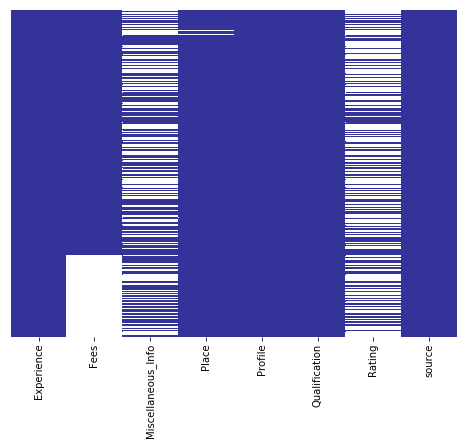

In [20]:
#Seeing the null values via visualization
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='terrain')

Observation:
    
    1-Fees, Miscellaneous_Info, Place, and Rating columns have NaN values.
    
    2-Fees is numeric data type thats why we impute NaN values with mean.
    
    3-Miscellaneous_Info, Place, and Rating columns are categorical data type thats why we impute NaN value with mode.

In [21]:
#Imputing the missing value of categorical column with mode 

for col in ['Miscellaneous_Info', 'Rating', 'Place']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
#Imputing the missing value of Numeric column with mean

df['Fees'].fillna(df['Fees'].mean(), inplace=True)

In [23]:
#Now again checking for missing values.
df.isnull().values.any()

False

In [24]:
df.isnull().sum()

Experience            0
Fees                  0
Miscellaneous_Info    0
Place                 0
Profile               0
Qualification         0
Rating                0
source                0
dtype: int64

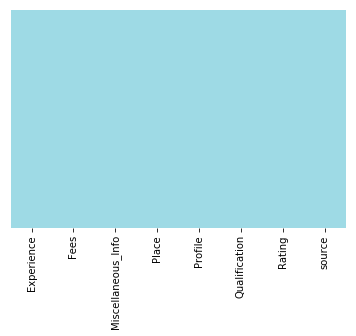

In [25]:
#Now again check it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

Observation:
    
    1-Now we impute all the missing values and our data is clean and ready to explore.

## Printing the Categorical data types and their unique value

In [26]:
#Printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('******************************************************************************')

Experience : ['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 years experience' '0 years experience'
 '27 years experience' '30 years experience' '52 years experience'
 '60 years experience' '26 years experience' '35 years experience'
 '34 years experience' '39 years experience' '32 years experience'
 '17 years experience' '28 years experience' '58 years experience'
 '4 years experience' '45 years experience' '44 years e

# Exploratory Data Analysis

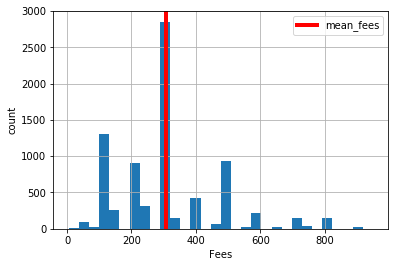

In [27]:
#Checking the mean of Fees

fees = df['Fees'].hist(bins=30)
mean_val = np.mean(df['Fees'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean_fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

## Experience vs Fees

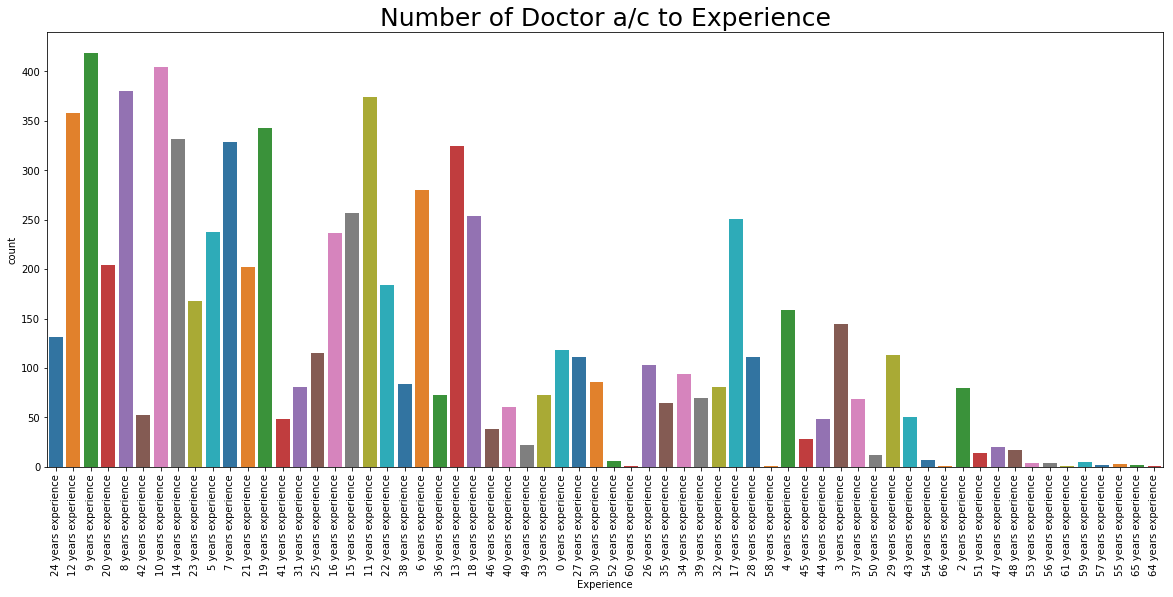

In [28]:
#Counting the number of Doctors according to their experience.
plt.figure(figsize=(20,8))
sns.countplot(x='Experience',data=df,palette='tab10')
plt.title("Number of Doctor a/c to Experience",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    1-There are 419 doctors who had a experience of 9 years. 

In [29]:
#Checking the mean fees of Doctor a/c to Experience.

most_exp=df.groupby(by='Experience')['Fees'].mean().sort_values(ascending=False).reset_index()
most_exp

,Experience,Fees
0,33 years experience,373.799877
1,50 years experience,351.986160
2,28 years experience,342.345897
3,31 years experience,338.969884
4,22 years experience,338.173650
5,52 years experience,335.981547
6,27 years experience,335.445994
7,14 years experience,333.775650
8,26 years experience,332.953675
9,35 years experience,332.819697


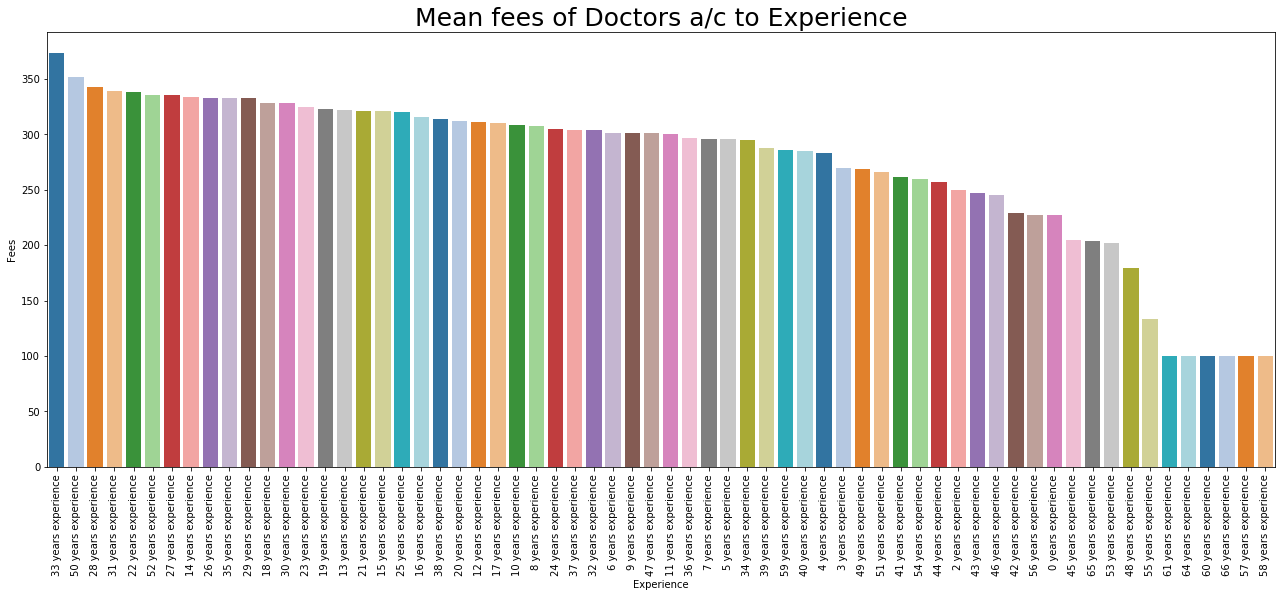

In [30]:
exp=pd.DataFrame(most_exp)

#Barplot

plt.figure(figsize=(22,8))
sns.barplot(x="Experience",y="Fees",data=exp,palette = "tab20")
plt.title('Mean fees of Doctors a/c to Experience',fontsize=25)
plt.ylabel("Fees")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    1-The doctor who had a experience of 33 years take the highest consultation fees.

In [31]:
df['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
19 years experience    343
14 years experience    332
7 years experience     329
13 years experience    325
6 years experience     280
15 years experience    257
18 years experience    254
17 years experience    251
5 years experience     238
16 years experience    237
20 years experience    204
21 years experience    202
22 years experience    184
23 years experience    168
4 years experience     159
3 years experience     144
24 years experience    131
0 years experience     118
25 years experience    115
29 years experience    113
27 years experience    111
28 years experience    111
26 years experience    103
34 years experience     94
30 years experience     86
                      ... 
33 years experience     73
36 years experience     73
39 years experience     70
37 years experience     69
35 years experience     65
40 years experience     61
4

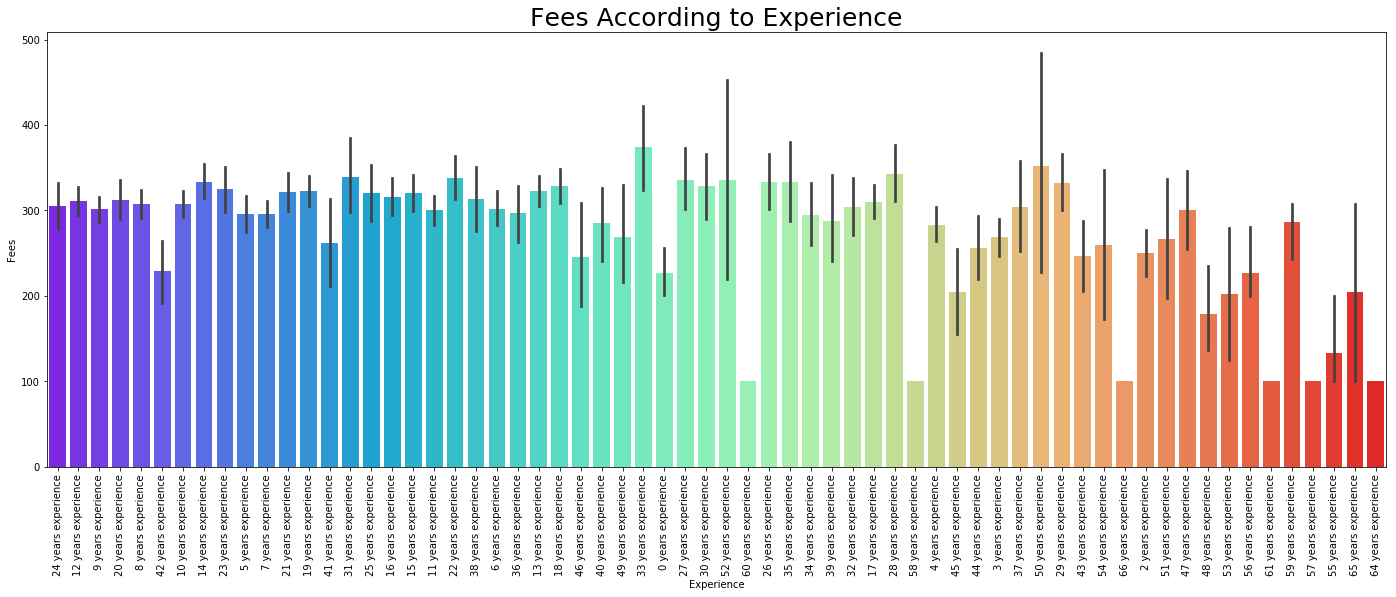

In [32]:
#Fees according to Experience
plt.figure(figsize=(24,8))
sns.barplot(x='Experience', y='Fees', data=df,palette='rainbow')
plt.title('Fees According to Experience',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
#Converting the Experience column in numeric data type

df['Exp_Year']=df['Experience'].str.slice(stop=2).astype(int)

In [34]:
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Exp_Year
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,24
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,12
2,9 years experience,300.0,Acrylic Partial Denture Crowns and Bridges Fix...,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",100%,Train,9
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",100%,Train,12
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train,20


## Rating vs Fees

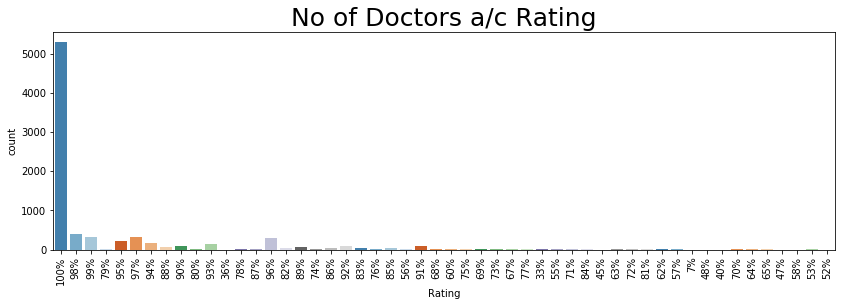

In [35]:
#Seeing number of doctors according to rating
plt.figure(figsize=(14,4))
sns.countplot(x='Rating',data=df,palette='tab20c')
plt.title("No of Doctors a/c Rating",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

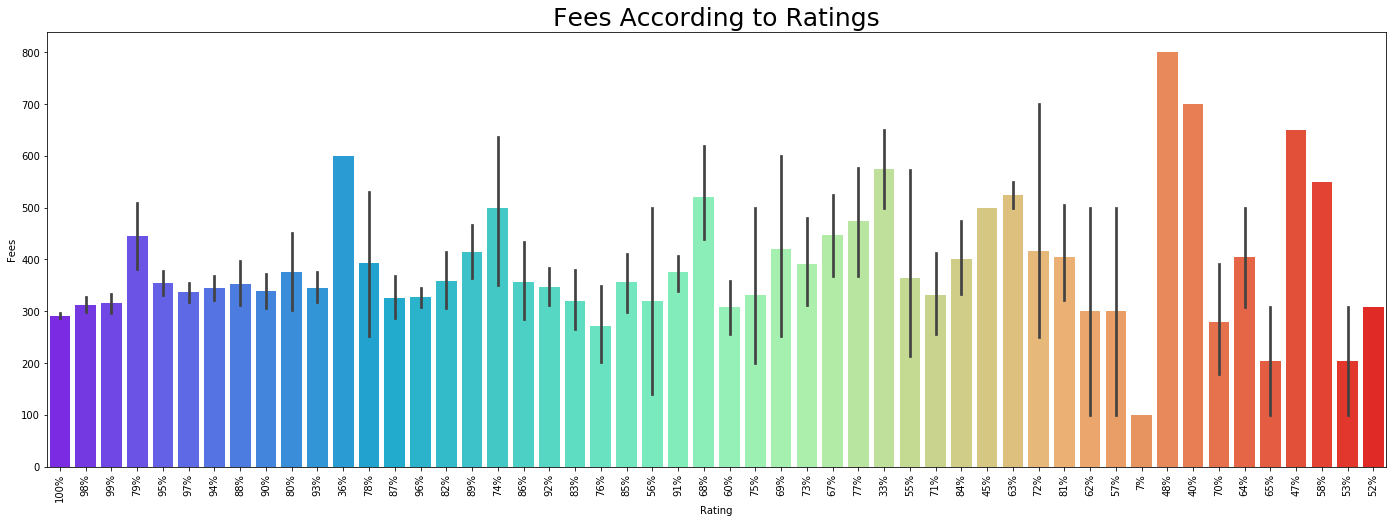

In [36]:
#Fees of the doctors according to the rating
plt.figure(figsize=(24,8))
sns.barplot(x='Rating', y='Fees', data=df,palette='rainbow')
plt.title('Fees According to Ratings',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    From this graph it is clearly seems that the doctor's consultation fee is not depends on their rating. Because the
    
    doctor's whose rating is 48% is take the highest consultation fees.

In [37]:
#Converting Rating column

df['Ratings']=df['Rating'].str.slice(stop=-1).astype(int)
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Exp_Year,Ratings
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,24,100
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,12,98
2,9 years experience,300.0,Acrylic Partial Denture Crowns and Bridges Fix...,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",100%,Train,9,100
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",100%,Train,12,100
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train,20,100


## Place vs Price

In [38]:
#First we extract city and locality from Place and then encoded it.

df['City'] = df['Place'].str.split(',').str[1]

df['Locality'] = df['Place'].str.split(',').str[0]

df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Exp_Year,Ratings,City,Locality
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,24,100,Ernakulam,Kakkanad
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,12,98,Bangalore,Whitefield
2,9 years experience,300.0,Acrylic Partial Denture Crowns and Bridges Fix...,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",100%,Train,9,100,Bangalore,Mathikere - BEL
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",100%,Train,12,100,Bangalore,Bannerghatta Road
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train,20,100,Chennai,Keelkattalai


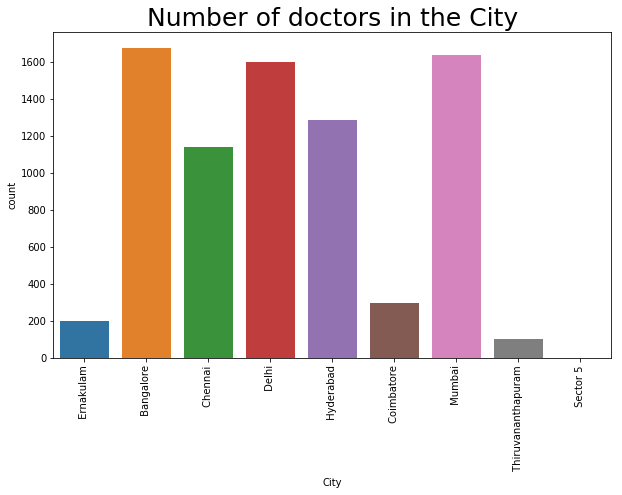

In [39]:
#Checking the number of doctors in the city
plt.figure(figsize=(10,6))
sns.countplot(x='City',data=df,palette='tab10')
plt.title("Number of doctors in the City",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

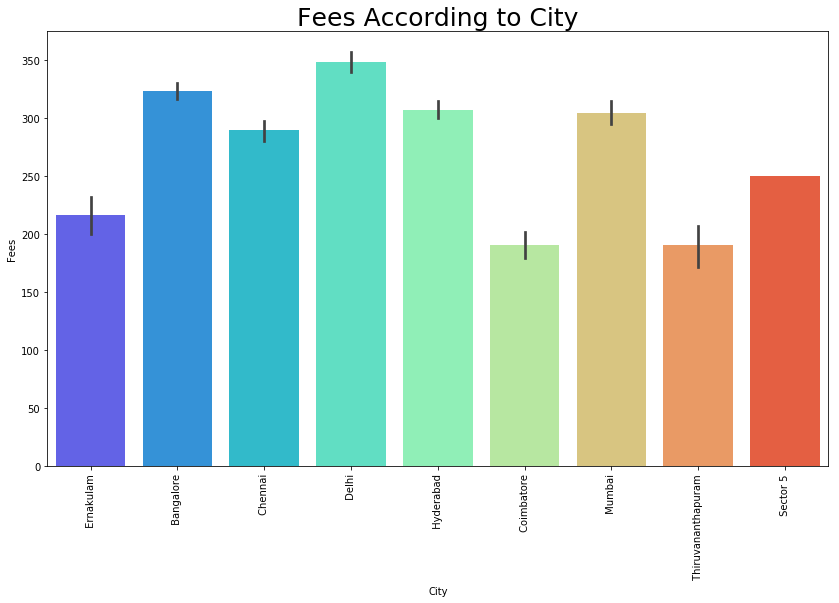

In [40]:
#Checking the doctors fees according to city
plt.figure(figsize=(14,8))
sns.barplot(x='City', y='Fees', data=df,palette='rainbow')
plt.title('Fees According to City',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

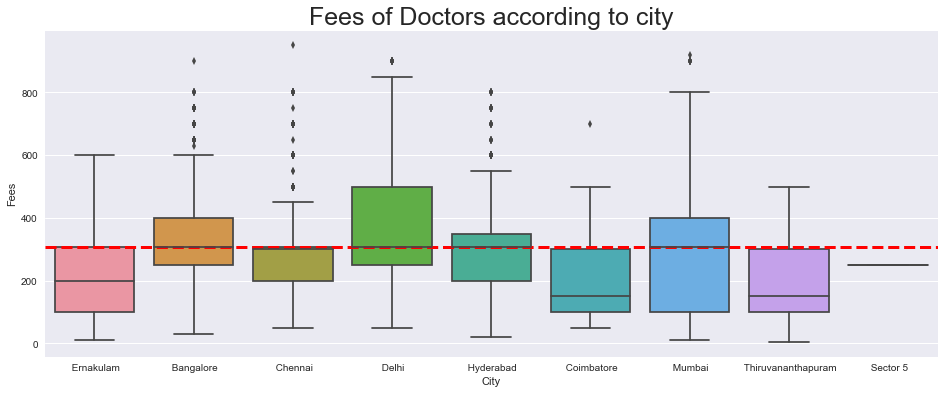

In [41]:
#Checking the mean fees a\c to city.
sns.set()
plt.subplots(figsize=(16, 6))
mean_fees=df.Fees.mean()
sns.boxplot(x='City', y='Fees', data=df)
plt.axhline(mean_fees,color='r',linestyle='dashed',linewidth=3)
plt.title('Fees of Doctors according to city',fontsize=25)
plt.show()

Observation:
    
    1-In Banglore city maximum numbers of doctors are there.
    
    2-In Delhi doctors consultant fees is higher.
    
    3-The mean of consultation fees is same for all the state. There are some doctors in Banglore, Chennai, Hyderabad 
      city who takes more fees.

## Profile vs Fees

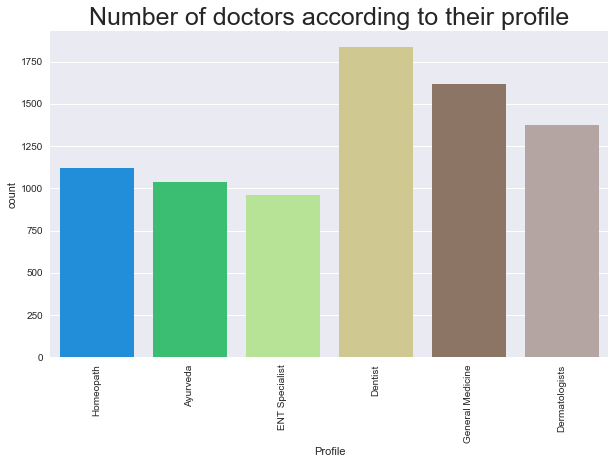

In [42]:
#Checking the number of Doctore according to their profile
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df,palette='terrain')
plt.title("Number of doctors according to their profile",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    1-The maximum doctors are from Dentist profile around 1800.
    
    2-The minimum doctors are from ENT profile around 950.

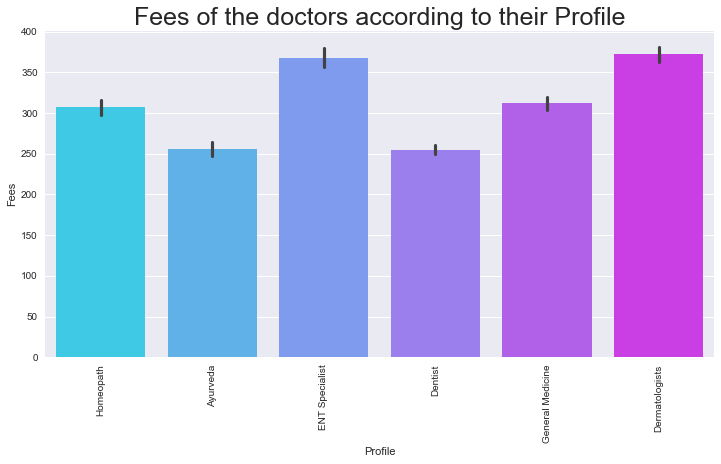

In [43]:
#Checking the fees of doctors according to their profile
plt.figure(figsize=(12,6))
sns.barplot(x='Profile', y='Fees', data=df,palette='cool')
plt.title('Fees of the doctors according to their Profile',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

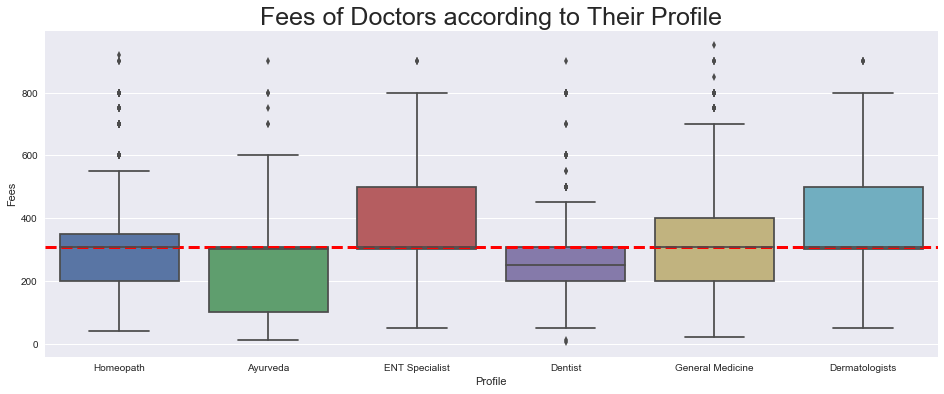

In [44]:
#Checking the mean fees according to doctors profile.
sns.set()
plt.subplots(figsize=(16, 6))
mean_fees=df.Fees.mean()
sns.boxplot(x='Profile', y='Fees', data=df)
plt.axhline(mean_fees,color='r',linestyle='dashed',linewidth=3)
plt.title('Fees of Doctors according to Their Profile',fontsize=25)
plt.show()

Observation:
    
    1-ENT Specialist and Dermatologists mean fees is higher than others profile fees.
    
    2-Ayurveda mean fees is low among all the profiles.

# Dealing with Categorical Column

In [45]:
df.head(3)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Exp_Year,Ratings,City,Locality
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,24,100,Ernakulam,Kakkanad
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,12,98,Bangalore,Whitefield
2,9 years experience,300.0,Acrylic Partial Denture Crowns and Bridges Fix...,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",100%,Train,9,100,Bangalore,Mathikere - BEL


In [46]:
#We will convert all categorical variables into numeric types using Label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


col=['Miscellaneous_Info','Qualification','Locality']
for i in col:
    df[i]=le.fit_transform(df[i])

In [47]:
df.head(2)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Exp_Year,Ratings,City,Locality
0,24 years experience,100.0,188,"Kakkanad, Ernakulam",Homeopath,491,100%,Train,24,100,Ernakulam,324
1,12 years experience,350.0,1951,"Whitefield, Bangalore",Ayurveda,92,98%,Train,12,98,Bangalore,925


In [48]:
#Converting City column

City = df['City']
City = pd.get_dummies(City, drop_first=True)
City.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [49]:
#Converting Profile column

Profile = df['Profile']
Profile = pd.get_dummies(Profile, drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


## Dropping Columns

In [50]:
#We dropped some of the columns

df.drop(columns=['Experience','Place','Profile','Rating','City','source'],axis=1, inplace=True)
df.head()

,Fees,Miscellaneous_Info,Qualification,Exp_Year,Ratings,Locality
0,100.0,188,491,24,100,324
1,350.0,1951,92,12,98,925
2,300.0,2174,1442,9,100,494
3,250.0,2299,572,12,100,74
4,250.0,341,16,20,100,367


In [51]:
#Adding our Profile, City column into df.

df1=pd.concat([df, Profile, City],axis=1)
df1.head()

,Fees,Miscellaneous_Info,Qualification,Exp_Year,Ratings,Locality,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,100.0,188,491,24,100,324,0,0,0,0,1,0,0,0,1,0,0,0,0
1,350.0,1951,92,12,98,925,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.0,2174,1442,9,100,494,0,0,1,0,0,0,0,0,0,0,0,0,0
3,250.0,2299,572,12,100,74,0,0,0,0,0,0,0,0,0,0,0,0,0
4,250.0,341,16,20,100,367,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
df1.shape

(7948, 19)

# To check the correlation

In [53]:
df_cor=df1.corr()
df_cor

,Fees,Miscellaneous_Info,Qualification,Exp_Year,Ratings,Locality,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
Fees,1.000000,-0.054881,0.228175,0.001823,-0.134488,-0.042411,-0.175861,0.177326,0.134767,0.013225,-0.002665,-0.045155,-0.140337,0.123702,-0.088633,-0.000859,-0.008886,-0.003932,-0.081407
Miscellaneous_Info,-0.054881,1.000000,-0.136725,-0.125984,0.303277,0.030635,0.328440,-0.136204,-0.089113,-0.074820,-0.053304,0.034408,-0.033534,-0.002413,-0.030437,0.042792,0.036046,0.000712,-0.017809
Qualification,0.228175,-0.136725,1.000000,0.129718,-0.161883,0.010452,-0.330031,0.263110,0.361303,0.307667,-0.154093,0.067822,-0.065131,0.034848,-0.025389,0.041804,-0.055837,-0.012548,-0.042282
Exp_Year,0.001823,-0.125984,0.129718,1.000000,-0.146129,0.026170,-0.204184,-0.096463,0.090773,0.326222,-0.080431,0.024592,-0.010768,0.052708,-0.012147,-0.048881,0.033954,-0.006456,-0.020362
Ratings,-0.134488,0.303277,-0.161883,-0.146129,1.000000,0.026491,0.090033,-0.126632,-0.144919,-0.022506,0.092805,0.057663,0.047360,-0.035317,0.035464,-0.029906,0.063231,0.004632,0.038390
Locality,-0.042411,0.030635,0.010452,0.026170,0.026491,1.000000,0.020799,-0.044198,-0.002640,0.044117,-0.010988,0.076367,0.107113,0.114399,-0.000320,-0.057550,-0.155297,-0.010861,0.060482
Dentist,-0.175861,0.328440,-0.330031,-0.204184,0.090033,0.020799,1.000000,-0.250634,-0.203649,-0.277186,-0.222134,0.030548,0.179209,-0.053745,0.107421,0.002490,-0.058285,0.020452,0.074354
Dermatologists,0.177326,-0.136204,0.263110,-0.096463,-0.126632,-0.044198,-0.250634,1.000000,-0.169675,-0.230944,-0.185076,-0.016394,-0.055151,0.019444,-0.022730,0.020973,0.017165,-0.005126,-0.052361
ENT Specialist,0.134767,-0.089113,0.361303,0.090773,-0.144919,-0.002640,-0.203649,-0.169675,1.000000,-0.187650,-0.150381,0.054557,-0.044868,0.025013,-0.020515,-0.000600,-0.060597,-0.004165,-0.042545
General Medicine,0.013225,-0.074820,0.307667,0.326222,-0.022506,0.044117,-0.277186,-0.230944,-0.187650,1.000000,-0.204683,0.060289,0.015420,-0.020042,-0.033628,0.032927,-0.025840,-0.005669,0.005651


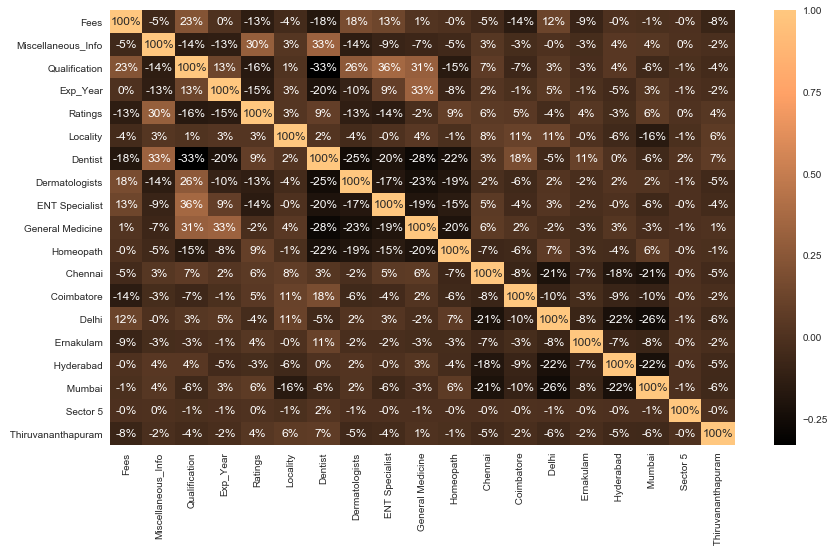

In [54]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(),annot=True,fmt='.0%',cmap='copper')
plt.show()

Text(0.5,1,'Correlation with target Variable')

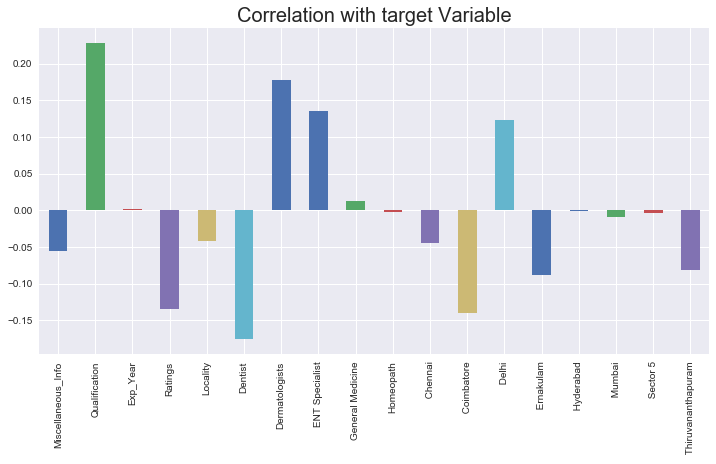

In [55]:
#Correlation with target column
plt.figure(figsize=(12,6))
df1.drop('Fees', axis=1).corrwith(df1['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)

Observation:
    
    Qualification is correlated with fees that tells us fess of the doctor depends on their qualification.

# Removing Outliers

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.25777007, 2.25722499, 0.50416261, ..., 0.50969364, 0.01121756,
        0.11458351],
       [0.25437526, 0.19713765, 1.26316729, ..., 0.50969364, 0.01121756,
        0.11458351],
       [0.0480538 , 0.06344061, 1.30489368, ..., 0.50969364, 0.01121756,
        0.11458351],
       ...,
       [0.        , 0.06344061, 1.11847147, ..., 0.50969364, 0.01121756,
        0.11458351],
       [0.        , 1.69818944, 1.11859497, ..., 0.50969364, 0.01121756,
        0.11458351],
       [0.        , 2.44769251, 0.66953637, ..., 0.50969364, 0.01121756,
        0.11458351]])

In [57]:
threshold=3
print(np.where(z>3))

(array([   0,    9,   12,   18,   20,   23,   25,   28,   38,   49,   55,
         67,   77,   85,  102,  104,  105,  110,  116,  118,  140,  144,
        148,  151,  159,  164,  174,  176,  178,  183,  185,  203,  204,
        209,  210,  211,  216,  218,  227,  252,  261,  266,  275,  293,
        298,  308,  309,  312,  316,  317,  322,  325,  333,  344,  363,
        372,  373,  376,  377,  379,  391,  394,  409,  414,  458,  465,
        471,  491,  498,  503,  519,  535,  537,  547,  552,  555,  562,
        581,  582,  585,  590,  594,  603,  610,  631,  632,  655,  656,
        673,  679,  686,  692,  698,  710,  717,  726,  731,  742,  749,
        787,  788,  810,  815,  816,  830,  835,  851,  868,  895,  896,
        901,  902,  904,  911,  918,  922,  941,  955,  968,  979,  980,
        987,  990,  991,  995,  998, 1009, 1016, 1018, 1021, 1025, 1044,
       1048, 1049, 1052, 1062, 1063, 1072, 1075, 1086, 1106, 1109, 1125,
       1127, 1158, 1170, 1174, 1181, 1195, 1201, 1

In [58]:
df1_new=df1[(z<3).all(axis=1)]

In [59]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(7948, 19) 		 (7090, 19)


In [60]:
df1=df1_new
df1.shape

(7090, 19)

## Feature Selection

In [61]:
df1.head(3)

,Fees,Miscellaneous_Info,Qualification,Exp_Year,Ratings,Locality,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
1,350.0,1951,92,12,98,925,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.0,2174,1442,9,100,494,0,0,1,0,0,0,0,0,0,0,0,0,0
3,250.0,2299,572,12,100,74,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#Splitting the data into input and output variable.
x=df1.drop(columns=['Fees'],axis=1)
x.head(2)

,Miscellaneous_Info,Qualification,Exp_Year,Ratings,Locality,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
1,1951,92,12,98,925,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2174,1442,9,100,494,0,0,1,0,0,0,0,0,0,0,0,0,0


In [63]:
y=df1['Fees']
y.head()

1    350.0
2    300.0
3    250.0
4    250.0
5    100.0
Name: Fees, dtype: float64

In [64]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(7090, 18) 		 (7090,)


In [65]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [66]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [67]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(5672, 18) 		 (1418, 18)


In [68]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(5672,) 	 (1418,)


In [69]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [70]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.09115575121456088
MAE: 114.01742049843122
MSE: 22358.30674101444
RMSE: 149.52694319424322
R2_score: 0.1015648916527967
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.022367189343052152
MAE: 111.85958105637073
MSE: 24317.890822886584
RMSE: 155.94194696388328
R2_score: 0.022821936861741055
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:
# Cross Validate All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [ 1.24542235e-01  1.19243221e-01  7.64623774e-02  1.28357317e-01
  1.01109596e-01  1.14801452e-01  1.00181145e-01  4.69235792e-02
 -2.15066257e+29 -2.46965165e+29]
Mean Score: -4.620314225774191e+28
Standard deviation: 9.268116548067562e+28
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [ 1.60564767e-02  2.10743728e-02  1.11768891e-02  1.52040728e-02
  1.54423123e-02  1.30252171e-02  1.88781193e-02  3.20670960e-02
 -4.51514300e+28 -3.66538246e+28]
Mean Score: -8.180525468823696e+27
Standard deviation: 1.6471018567721881e+28
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_fe

### Above All models DecisionTreeRegressor  and RandomForestRegressor gives the best result.

Using GridSearchCV to find the best parameters for RandomForestRegressor and DecisionTreeRegressor

In [72]:
#DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters={'criterion':('mse', 'friedman_mse', 'mae'),'random_state':range(42,60)}
DTC=DecisionTreeRegressor()

clf=GridSearchCV(DTC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'mae', 'random_state': 57}


In [73]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 700}


In [79]:
#Using Random Forest Regressor with its best parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=4)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')  

Score: 0.13505354981890016


Mean absolute error: 114.81336348608737
Mean squared error: 22080.231323726188
Root Mean Squared Error: 148.5941833441881


r2_score: 0.112738936295532




In [84]:
#Using DecisionTreeRegressor with its best result


dtc=DecisionTreeRegressor(criterion='mse', min_samples_split=2, min_samples_leaf=1,random_state=57)
dtc.fit(x_train,y_train)
print('Score:',dtc.score(x_train,y_train))
pred=dtc.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print("r2_score:",r2_score(y_test,pred))
print('\n')  

Score: 0.9968932290585192


Mean absolute error: 154.00420919769323
Mean squared error: 44589.995576710666
Root Mean Squared Error: 211.16343333236148


r2_score: -0.7917822655896574




### I Choose DecisionTreeRegressor as my final model.

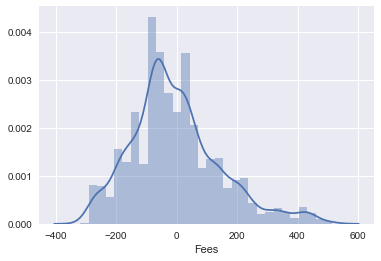

In [85]:
#plotting the distribution plot for DecisionTreeRegressor.

sns.distplot(y_test-y_pred)
plt.show()

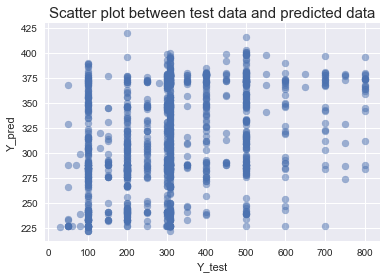

In [86]:
#Scatter plot between test data and prediction
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [87]:
#Saving the model
#Importing joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(dtc,'Doctors_Consultation_Fees_dtc.csv')

['Doctors_Consultation_Fees_dtc.csv']